In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
def fit_linear_regressions(df, desired_score):
    # This dictionary will store the subject as key and slope as value
    slopes = []
    
    scaler = StandardScaler()
    df_slope = df.copy()
    df_slope.loc[:,'Standardized score'] = scaler.fit_transform(df_slope[desired_score].values.reshape(-1, 1))

    # Grouping the dataframe by 'subject'
    grouped = df_slope.groupby('Patient_Id')
    
    for subject, group in grouped:
        total_std = group[desired_score].std()
        group.reset_index(drop=True, inplace=True)
        group.loc[:, 'Standardized score'] = group.loc[:, 'Standardized score'] - group.loc[0, 'Standardized score']
        
        # Fit the linear regression model
        if total_std != 0:  # To avoid division by zero if all scores are the same
            slope, intercept, r_value, p_value, std_err = linregress(group['YearsFromV1'], group['Standardized score'])
            slopes.append(slope)
        else:
            slopes.append(0)  # Or any other indicator of undefined slope due to zero variance
    
    return slopes

In [2]:
df = pd.read_csv(r"C:\U-Extend\codes\files\merged_ultra_vpc1.csv")
df['YearsFromV1'] = df['DaysFromV1'] / 365.25
df

,PID_x,visits,vpc1,max_vel,PID_y,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,...,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate,Patient_Id,Brooke_Score,YearsFromV1
0,1,2021-03-26,7.293693,155.401739,s1,1,V1,2021-03-26,0,0,...,11.32,31.96,0.29,51.62,0.089818,0,0.096095,1.0,1.0,0.000000
1,1,2021-07-08,-0.665350,278.689717,s1,1,V2,2021-07-08,162,5,...,11.40,36.08,0.26,56.29,0.215860,0,0.144131,1.0,1.0,0.443532
2,1,2021-11-10,3.877086,218.110332,s1,1,V3,2021-11-10,287,9,...,11.30,36.21,0.26,47.29,0.263957,0,0.171691,1.0,1.0,0.785763
3,1,2023-08-15,0.225764,157.145360,s1,1,V4,2023-08-15,930,30,...,14.04,38.31,0.31,66.72,0.316537,0,0.248563,1.0,2.0,2.546201
4,2,2021-02-11,15.854707,18.808684,s2,2,V1,2021-02-11,0,0,...,9.94,36.76,0.24,72.11,NaN,1,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,51,2023-09-27,20.976308,24.880956,s51,51,V1,2023-09-27,0,0,...,14.38,35.06,0.35,56.80,0.161860,0,0.058501,NaN,NaN,0.000000
69,52,2023-09-27,-2.283372,278.458220,s52,52,V1,2023-09-27,0,0,...,16.46,38.71,0.33,36.40,0.485556,0,0.338326,NaN,NaN,0.000000
70,53,2023-10-12,-6.039575,330.409320,s53,53,V1,2023-10-12,0,0,...,11.60,31.48,0.32,29.83,0.182064,0,0.172246,NaN,NaN,0.000000
71,56,2023-12-14,12.115959,80.404012,s56,56,V1,2023-12-14,0,0,...,13.26,31.30,0.34,77.85,0.000000,0,0.009443,NaN,NaN,0.000000


In [4]:
multiple_visits_list = []

for i, g in df.groupby('PID_x'):
    if g.shape[0] > 1:
        g.sort_values(by=['YearsFromV1'], inplace=True)
        g.reset_index(drop=True, inplace=True)
        multiple_visits_list.append(g)

multiple_visits_df = pd.concat(multiple_visits_list, axis = 0).reset_index(drop=True)
multiple_visits_df[['PID_x','Cohort','visits', 'YearsFromV1', 'Norm_Torque_Nmcm','BIC_Avg_Echo', 'BRD_Avg_Echo','Brooke_Score']]

,PID_x,Cohort,visits,YearsFromV1,Norm_Torque_Nmcm,BIC_Avg_Echo,BRD_Avg_Echo,Brooke_Score
0,1,DMD,2021-03-26,0.000000,0.081803,57.06,51.62,1.0
1,1,DMD,2021-07-08,0.443532,0.091589,53.24,56.29,1.0
2,1,DMD,2021-11-10,0.785763,0.158179,51.38,47.29,1.0
3,1,DMD,2023-08-15,2.546201,0.112916,86.00,66.72,2.0
4,3,SMA,2021-02-24,0.000000,0.110601,41.23,48.76,2.0
5,3,SMA,2021-07-20,0.399726,0.097725,46.03,NaN,2.0
6,9,DMD,2021-09-22,0.498289,NaN,49.49,42.19,1.0
7,9,DMD,2023-10-12,2.551677,0.231307,40.77,34.27,1.0
8,10,SMA,2021-03-24,0.000000,NaN,43.37,36.88,1.0
9,10,SMA,2021-10-14,0.558522,0.291108,45.31,46.52,1.0


In [5]:
multiple_visits_df.to_csv(r"C:\U-Extend\codes\files\multiple_visit_vpc1.csv", index=False)

In [8]:
import scipy.stats

rows = list(multiple_visits_df.loc[:,'vpc1':'max_vel'].columns)
cols = ['Norm_Torque_Nmcm','BIC_Avg_Echo', 'BRD_Avg_Echo','Brooke_Score']

results_df = pd.DataFrame(index=rows, columns=cols)

for r in rows:
    for c in cols:
        df_cleaned = multiple_visits_df.dropna(subset=[r, c])
        correlation, p_value = scipy.stats.pearsonr(df_cleaned[r], df_cleaned[c])
        if p_value < 0.05:
            p_value_rounded = f"{p_value:.2e}"
        else:
            p_value_rounded = 1
        results_df.loc[r, c] = (round(correlation, 2), p_value_rounded)
        #print(round(correlation, 2), p_value)
                
results_df

,Norm_Torque_Nmcm,BIC_Avg_Echo,BRD_Avg_Echo,Brooke_Score
vpc1,"(0.26, 1)","(0.22, 1)","(0.13, 1)","(0.37, 2.31e-02)"
max_vel,"(-0.04, 1)","(-0.31, 4.09e-02)","(-0.22, 1)","(-0.31, 1)"


In [11]:
slope_df = pd.DataFrame()

wearable_cols = multiple_visits_df.loc[:,'vpc1':'max_vel'].columns

for c in wearable_cols:
    slope_df[c] = fit_linear_regressions(multiple_visits_df, c)

In [15]:
# slope_df

In [12]:
us_cols = ['Norm_Torque_Nmcm', 'BIC_Avg_Echo', 'BRD_Avg_Echo', 'Brooke_Score']

for c in us_cols:
    slope_df[c] = fit_linear_regressions(multiple_visits_df, c)


In [16]:
# slope_df['Patient_Id'] = multiple_visits_df['PID_x'].unique()

In [253]:
multiple_visits_cohorts = []

for i, g in multiple_visits_df.groupby('Patient_Id'):
    multiple_visits_cohorts.append(g['Cohort'].values[0])

slope_df['Cohort'] = multiple_visits_cohorts

In [247]:
for r in rows:
    for c in cols:
        df_cleaned = slope_df.dropna(subset=[r, c])
        correlation, p_value = scipy.stats.pearsonr(df_cleaned[r], df_cleaned[c])
        if p_value < 0.05:
            p_value_rounded = f"{p_value:.2e}"
        else:
            p_value_rounded = 1
        results_df.loc[r, c] = (round(correlation, 2), p_value_rounded)
        #print(round(correlation, 2), p_value)
                
results_df

,Norm_Torque_Nmcm,BIC_Avg_Echo,BRD_Avg_Echo,Brooke_Score
Scaling_factor,"(0.13, 1)","(-0.25, 1)","(-0.37, 1)","(-0.01, 1)"
Mean_Duration,"(0.13, 1)","(-0.25, 1)","(-0.37, 1)","(-0.01, 1)"
Median_Duration,"(0.12, 1)","(-0.29, 1)","(-0.35, 1)","(0.0, 1)"
Std_Duration,"(0.17, 1)","(-0.27, 1)","(-0.31, 1)","(-0.01, 1)"
Max_Duration,"(0.22, 1)","(-0.34, 1)","(-0.42, 1)","(0.0, 1)"
Perc10_Duration,"(-0.2, 1)","(0.47, 1)","(-0.01, 1)","(0.18, 1)"
Perc90_Duration,"(-0.14, 1)","(0.01, 1)","(-0.24, 1)","(-0.04, 1)"
Mean_Log_Mean,"(0.2, 1)","(-0.32, 1)","(-0.3, 1)","(0.09, 1)"
Median_Log_Mean,"(0.18, 1)","(-0.33, 1)","(-0.29, 1)","(0.09, 1)"
Std_Log_Mean,"(-0.06, 1)","(-0.14, 1)","(-0.27, 1)","(-0.47, 1)"


In [84]:
# median_slope = []
# cohort_index = []

# for i, g in slope_df.groupby('Cohort'):
#     g_sub = g.loc[:, 'Scaling_factor':'Brooke_Score']
#     median_slope.append(g_sub.median(axis=0))
#     cohort_index.append(i)

# median_slope = pd.DataFrame(median_slope)
# median_slope.columns = slope_df.loc[:, 'Scaling_factor':'Brooke_Score'].columns
# median_slope.index = cohort_index

In [85]:
# pd.set_option('display.max_columns', None)
# median_slope

In [20]:
def zero_start(features_X):
    X_scaled = features_X.values
    X_scaled = X_scaled - X_scaled[0]
    return X_scaled

def standardize(features_X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_X.values.reshape(-1, 1))
    return X_scaled


def sub_traj(sub, df_patient, feature_name):

    feature = zero_start(multiple_visits_df[multiple_visits_df['PID_x']==sub][feature_name])
    brooke = zero_start(multiple_visits_df[multiple_visits_df['PID_x']==sub]['Brooke_Score'])
    net = zero_start(multiple_visits_df[multiple_visits_df['PID_x']==sub]['max_vel'])
    brd_avg_echo = zero_start(multiple_visits_df[multiple_visits_df['PID_x']==sub]['BRD_Avg_Echo'])
    bic_avg_echo = zero_start(multiple_visits_df[multiple_visits_df['PID_x']==sub]['BIC_Avg_Echo'])

    time = df_patient[df_patient['PID_x']==sub]['YearsFromV1']
    
    plt.figure()
    # plt.plot(time, feature, label='Scaling_factor')
    # plt.plot(time, brooke, label='Brooke Score')
    # plt.plot(time, net, label='NET')
    # plt.plot(time, brd_avg_echo, label='BRD_Avg_Echo')
    # plt.plot(time, bic_avg_echo, label='BIC_Avg_Echo')

    plt_data = pd.DataFrame()
    plt_data['z-score_feature'] = feature
    plt_data['z-score_brooke'] = brooke 
    plt_data['z-score_net'] = net
    plt_data['z-score_brd'] = brd_avg_echo
    plt_data['z-score_bic'] = bic_avg_echo
    
    plt_data['time'] = time.values

    sns.regplot(data=plt_data, x="time", y='z-score_feature', ci=None, label=feature_name)
    sns.regplot(data=plt_data, x="time", y='z-score_brooke', ci=None, label='Brooke_Score')
    sns.regplot(data=plt_data, x="time", y='z-score_net', ci=None, label='Max_vel')
    sns.regplot(data=plt_data, x="time", y='z-score_brd', ci=None, label='BRD Avg Echo')
    # sns.regplot(data=plt_data, x="time", y='z-score_bic', ci=None, label='BIC Avg Echo')

    slope, intercept, r_value, p_value, std_err = linregress(plt_data['time'], plt_data['z-score_feature'])
    slope = round(slope, 2)
    #p_value = round(p_value, 5)
    
    plt.ylabel('z-score')
    plt.xlabel('Time (year)') 
    cohort_info = df_patient[df_patient['PID_x']==sub]['Cohort'].iloc[0]
    #plt.ylim(-4, 4) 
    plt.title(str(sub) + " " + cohort_info + " Slope:" + str(slope) + " p_value:" + str(p_value))
    plt.legend()


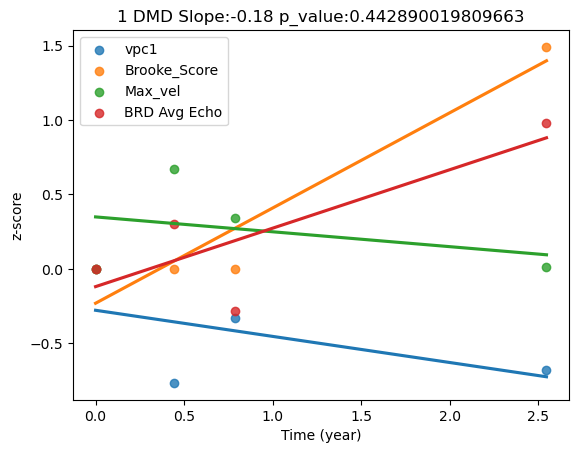

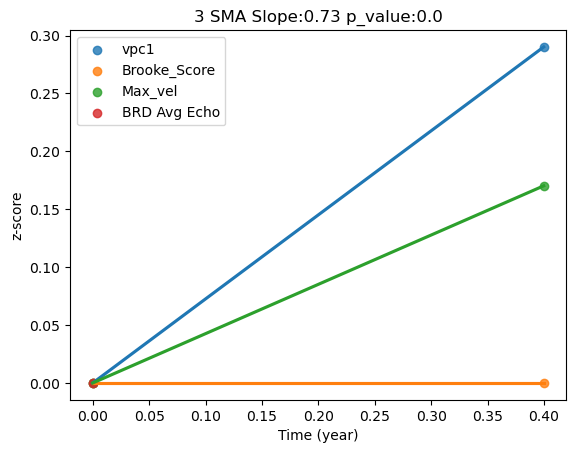

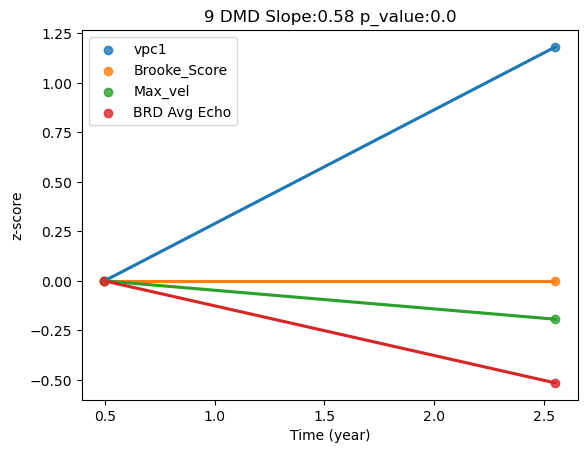

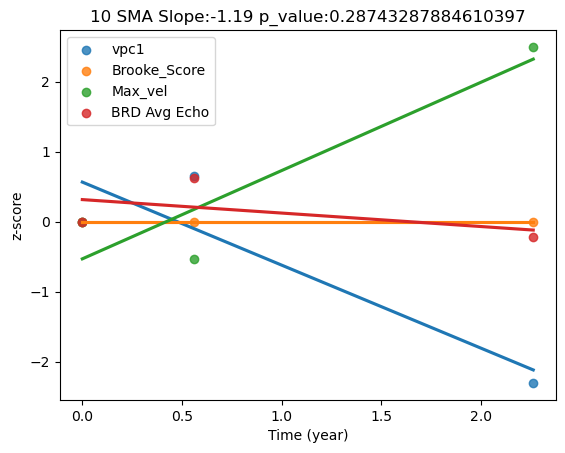

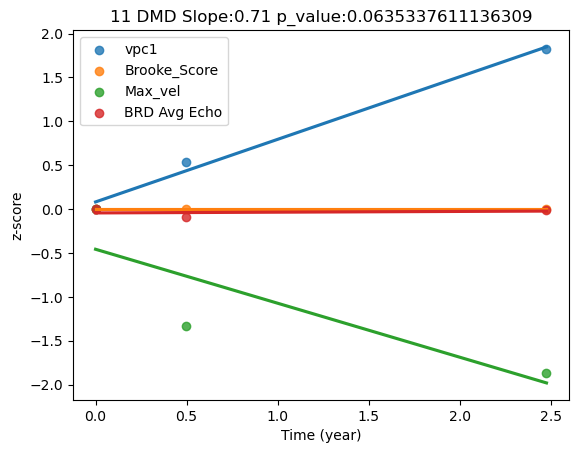

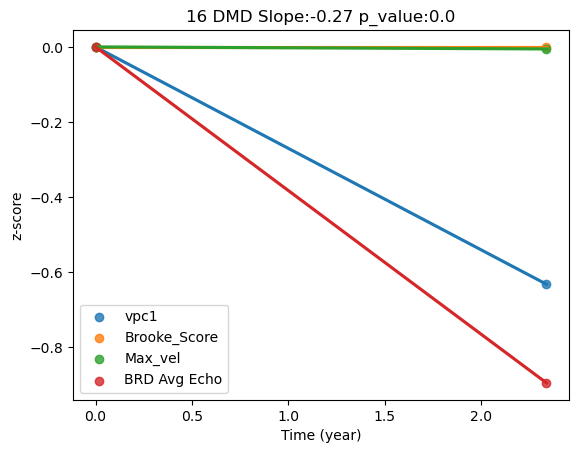

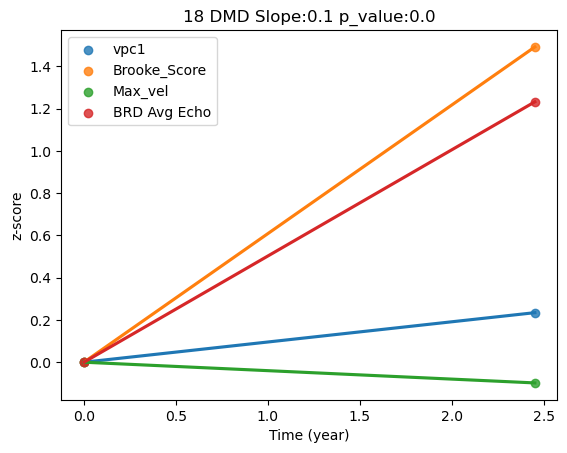

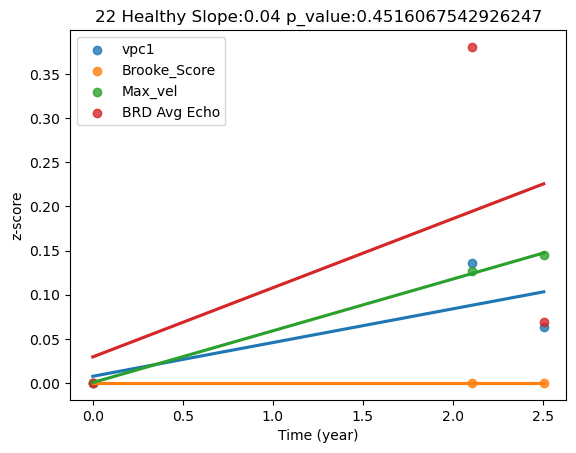

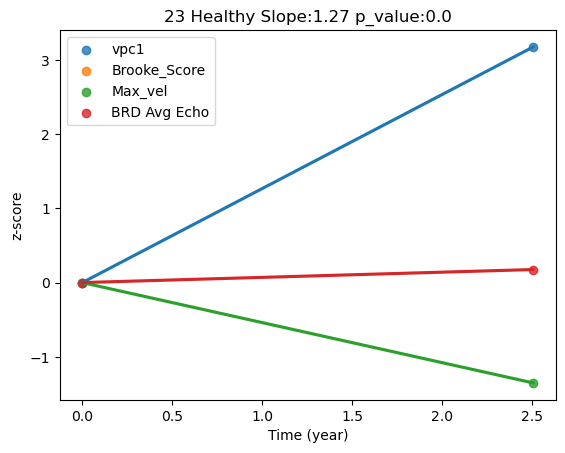

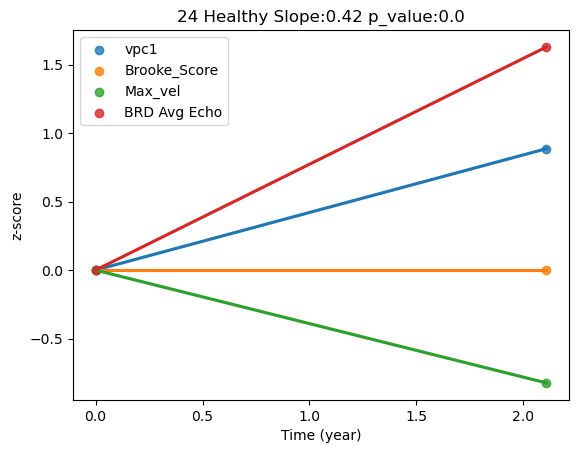

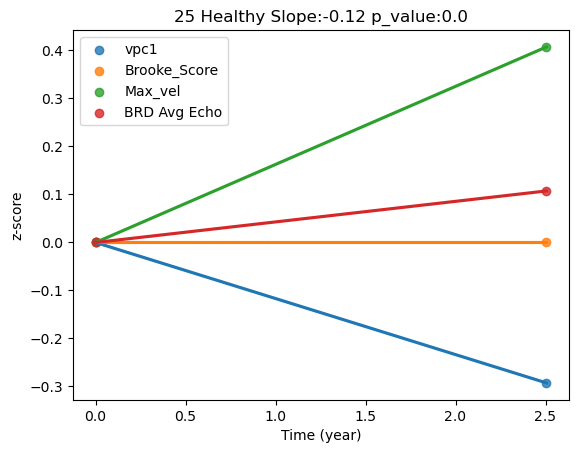

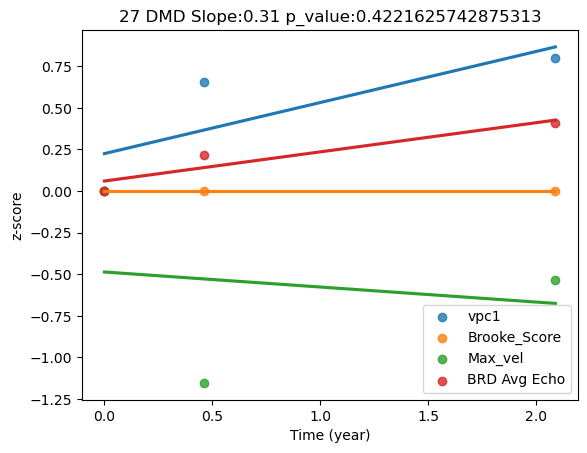

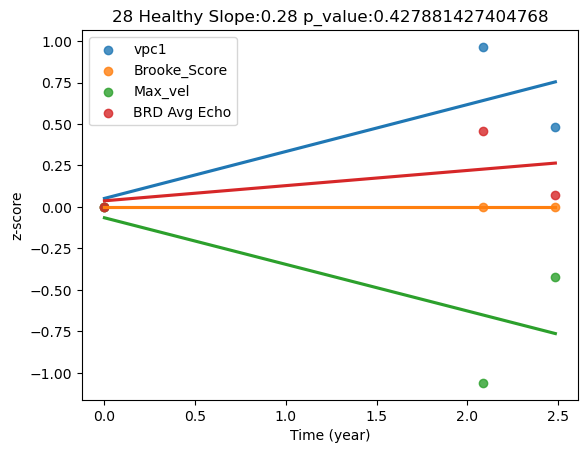

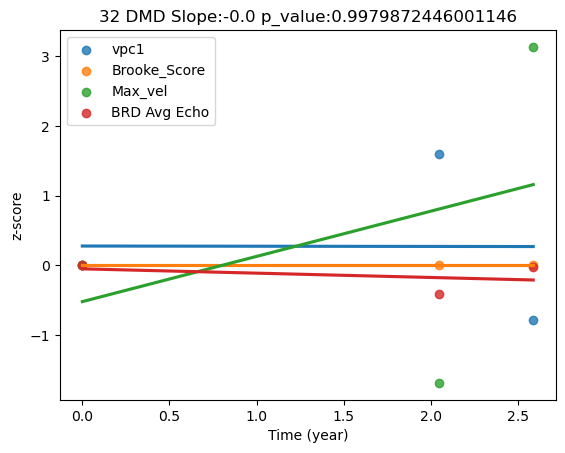

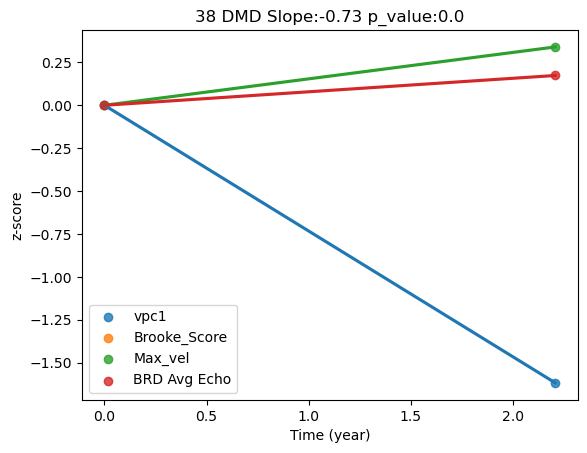

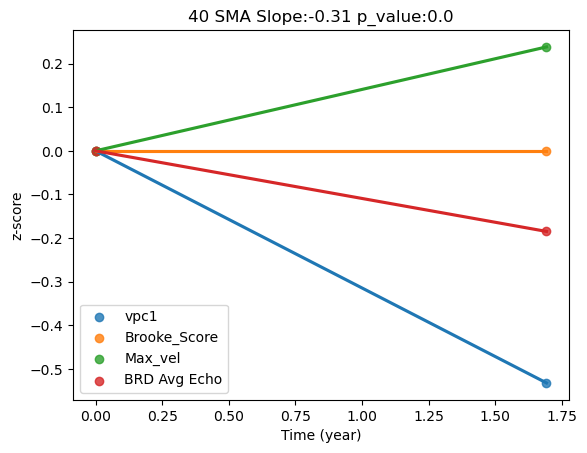

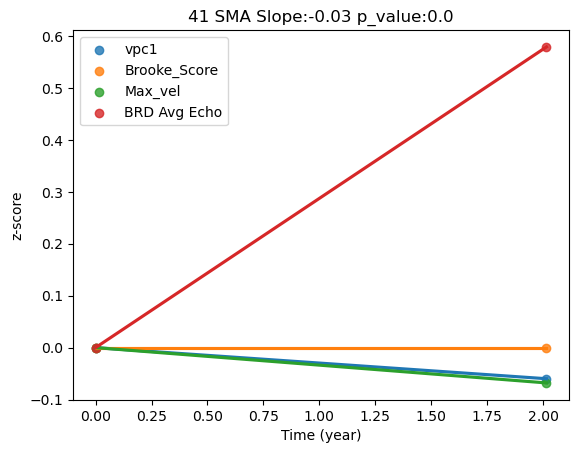

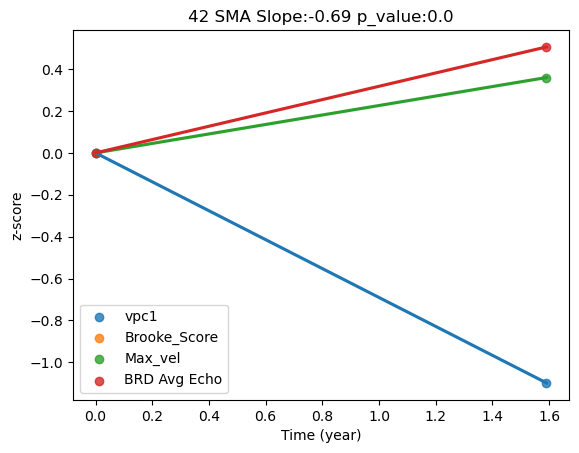

In [23]:
df_copy = multiple_visits_df

unique_subs = df_copy['PID_x'].unique()

feature_name = 'vpc1'

df_copy[feature_name] = standardize(df_copy[feature_name])
df_copy['Brooke_Score'] = standardize(df_copy['Brooke_Score'])
df_copy['max_vel'] = standardize(df_copy['max_vel'])
df_copy['BRD_Avg_Echo'] = standardize(df_copy['BRD_Avg_Echo'])
df_copy['BIC_Avg_Echo'] = standardize(df_copy['BIC_Avg_Echo'])


for s in unique_subs:
    sub_traj(s, df_copy, feature_name)